In [1]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2


In [76]:
import argparse

# Create an ArgumentParser object
ap = argparse.ArgumentParser()

# Add the image argument
ap.add_argument("-i", "--image", required=False,
    help="path to input image")

# Provide the image path here
image_path = "/content/Screenshot 2023-10-25 132056.png"

# Access the value of the 'image' argument using dot notation
args = ap.parse_known_args()[0]
args.image = image_path

# Now you can use the 'image_path' variable in your script
if args.image:
    print(f"Image path: {args.image}")
else:
    print("No image path provided.")

Image path: /content/Screenshot 2023-10-25 132056.png


In [77]:
# Read the image using the provided image path
image = cv2.imread(image_path)

if image is not None:
    orig = image.copy()
    # The rest of your image processing code goes here
else:
    print("Failed to load the image.")

In [78]:
image = cv2.resize(image,(28,28))
image = image.astype('float')/255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [79]:
model= load_model('/content/mymodel.h5')


In [80]:
(not_notes, notes) = model.predict(image)[0]

1/1 [==============================] - 0s 107ms/step


In [81]:
label = 'notes' if notes > not_notes else "not_notes"
proba = notes if notes > not_notes else not_notes
label = "{}: {:.2f}%".format(label,proba*100)

In [82]:
output = imutils.resize(orig,width=400)
cv2.putText(output,label,(10,25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

array([[[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [56, 56, 56]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [56, 56, 56]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [56, 56, 56]],

       ...,

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [56, 56, 56]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [56, 56, 56]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [56, 56, 56]]], dtype=uint8)

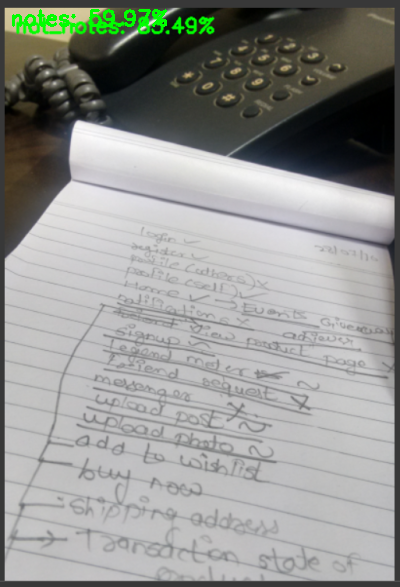

-1

In [83]:
from google.colab.patches import cv2_imshow

# Display the image using cv2_imshow
cv2_imshow(output)
cv2.waitKey(0)